In [ ]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: Juan Sebastian Novoa Ortiz

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [ ]:
f = lambda x: 3**x

def derivada(f, x, tol=1e-8):
    """
    Entrada:
    f: funcion definida
    x (float): punto a evaluar de la derivada
    tol (float): tolerancia que se busca alcanzar

    Retorna:
    valor_derivada_final (float): aproximacion de la derivada en el punto x.
    h_valores (list): lista de valores h usados.
    """
    # Valores de h inicial y lista de valores de h
    h = 0.1
    h_valores = []

    # se calcula una primera aproximacion para poder iniciar el bucle.
    valor_derivada_anterior = (f(x + h) - f(x - h)) / (2 * h)

    while True:
        # valorr de h usado
        h_valores.append(h)

        # se reduce h para la siguiente iteracion, y se actualiza la derivada
        h = h / 2.0
        valor_derivada_actual = (f(x + h) - f(x - h)) / (2 * h)

        # se usa para detener el ciclo en caso de que la diferencia de menor a la tolerancia
        if np.abs(valor_derivada_actual - valor_derivada_anterior) < tol:
            break

        # se actualiza el valor anterior para la proxima comparacion.
        valor_derivada_anterior = valor_derivada_actual

    return valor_derivada_actual, h_valores

punto_x = 2.0
valor_f_prima, lista_h = derivada(f, punto_x)

print(f"Calculo de la Derivada en x = {punto_x}")
print(f"El valor aproximado de f'({punto_x}) es: {valor_f_prima:.8f}")
print(f"Se necesitaron {len(lista_h)} iteraciones.")
print(f"El ultimo valor de h utilizado fue: {lista_h[-1]}")

Calculo de la Derivada en x = 2.0
El valor aproximado de f'(2.0) es: 9.88751060
Se necesitaron 12 iteraciones.
El ultimo valor de h utilizado fue: 4.8828125e-05


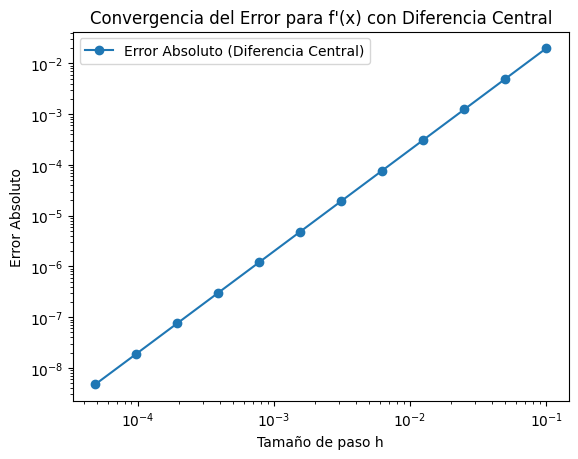

In [ ]:
# valor exacto derivada
valor_exacto = ((3)**punto_x) * np.log(3)

# se calcula el error absoluto para cada valor de h utilizado.
errores_absolutos = []
for h_actual in lista_h:
    aprox_actual = (f(punto_x + h_actual) - f(punto_x - h_actual)) / (2 * h_actual)
    error = np.abs(aprox_actual - valor_exacto)
    errores_absolutos.append(error)


plt.loglog(lista_h, errores_absolutos, 'o-', label='Error Absoluto (Diferencia Central)')
plt.title("Convergencia del Error para f'(x) con Diferencia Central")
plt.xlabel("Tamaño de paso h")
plt.ylabel("Error Absoluto")
plt.legend()
plt.show()

## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



In [ ]:
# Valores a interpolar
r_cm = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
v_cms = np.array([2.0, 1.92, 1.68, 1.28, 0.72, 0.0])

# constantes
radio_cm = 1.0
viscosidad_dinamica = 0.001

# Conversion a metros y metros por segundo
r_m = r_cm/100
v_ms = v_cms/100
radio_m = radio_cm/100

In [ ]:
# Polinomio de lagrange
polinomio_lagrange = lagrange(r_m, v_ms)
print(polinomio_lagrange)


           5             3       2
3.815e-06 x + 9.313e-10 x - 200 x - 2.132e-14 x + 0.02


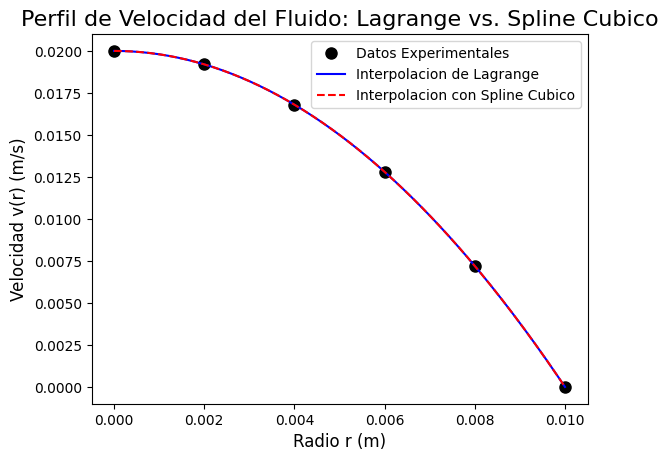

In [ ]:
# b Graficas

# Spline cubico
spline_cubico = CubicSpline(r_m, v_ms)

# rango de radios graficacion
r_grafica = np.linspace(0, radio_m, 200)

# Velocidades por interpolacion
v_lagrange = polinomio_lagrange(r_grafica)
v_spline = spline_cubico(r_grafica)


# datos originales
plt.plot(r_m, v_ms, 'o', color='black', markersize=8, label='Datos Experimentales')
# lagrange
plt.plot(r_grafica, v_lagrange, 'b-', label='Interpolacion de Lagrange')
# spline_cubico
plt.plot(r_grafica, v_spline, 'r--', label='Interpolacion con Spline Cubico')

plt.title("Perfil de Velocidad del Fluido: Lagrange vs. Spline Cubico")
plt.xlabel("Radio r (m)")
plt.ylabel("Velocidad v(r) (m/s)")
plt.legend()
plt.show()

In [ ]:
# conversion pol lagrange a simbolico para derivar y evaluar
pol_lagrange = lambda x: (3.815e-06 * x**5) + (9.313e-10 * x**3 - 200 * x**2) - (2.132e-14 * x**1) + 0.02
x_sym = sp.Symbol('x')
polinomio_simbolico = (3.815e-06 * x_sym**5) + (9.313e-10 * x_sym**3 - 200 * x_sym**2) - (2.132e-14 * x_sym) + 0.02
derivada_simbolica = sp.diff(polinomio_simbolico, x_sym)

esfuerzo_cortante = sp.lambdify(
    x_sym,                 # La variable de la funcion
    derivada_simbolica,    # La expresion a convertir
    'numpy'                # El "backend" numerico (permite usar arrays de numpy)
)

puntos_grafica = np.linspace(0, 1, len(esfuerzo_cortante))
esfuerzo_cortante_evaluado = esfuerzo_cortante(viscosidad_dinamica*puntos_grafica)
plt.plot(esfuerzo_cortante, esfuerzo_cortante_evaluado, 'r--', label='esfuerzszo cortante con r')
plt.title("esfuerzo cortante vs r")
plt.xlabel("r", fontsize=12)
plt.ylabel("esfuerzo cortante")
plt.legend()
plt.show()


TypeError: object of type 'function' has no len()

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [ ]:
# a. Calculo de la Masa Total

# metodo con quad

# integral mas interna
f_z = lambda z, y, x: x*y*z
# integral intermedia
f_y = lambda y, x: quad(f_z, 0, 1 - x - y, args=(y, x))[0]
# integral externa
f_x = lambda x: quad(f_y, 0, 1 - x, args=(x))[0]

# integral final
masa_iterativa, error_iterativo = quad(f_x, 0, 1)

print(f"Resultado con quad iterativo: m = {masa_iterativa:.8f} kg")

# usando tplquad

masa_tplquad, error_tplquad = tplquad(
    lambda z, y, x: x * y * z,
    0, 1,                       # limites para x (externa)
    lambda x: 0, lambda x: 1 - x,  # limites para y (intermedia)
    lambda x, y: 0, lambda x, y: 1 - x - y  # limites para z (interna)
)

print(f"Resultado con tplquad: m = {masa_tplquad:.8f} kg")

Resultado con quad iterativo: m = 0.00138889 kg
Resultado con tplquad: m = 0.00138889 kg


Se define que ambos metodos arrojan practicamente el mismo valor de integral necesario

Inercia utilizando tplquad

In [ ]:
# metodo de tplquad para Iz
I_z , error_tplquad_iz = tplquad(
    lambda z, y, x: ((x * y * z) * (x**2 + y**2)),
    0, 1,                       # limites para x (externa)
    lambda x: 0, lambda x: 1 - x,  # limites para y (intermedia)
    lambda x, y: 0, lambda x, y: 1 - x - y  # limites para z (interna)
)
print(f"Resultado con tplquad: I_z = {I_z:.8f}")

# metodo de tplquad para Ix
I_x , error_tplquad_iz = tplquad(
    lambda z, y, x: (x * y * z) * (z**2 + y**2),
    0, 1,                       # limites para x (externa)
    lambda x: 0, lambda x: 1 - x,  # limites para y (intermedia)
    lambda x, y: 0, lambda x, y: 1 - x - y  # limites para z (interna)
)
print(f"Resultado con tplquad: I_x = {I_x:.8f}")

Resultado con tplquad: I_z = 0.00029762
Resultado con tplquad: I_x = 0.00029762


Inercia usando quad iterativo

In [ ]:
# metodo con quad para I_z

# integral mas interna
f_z = lambda z, y, x: (x*y*z)*(x**2 + y**2)
# integral intermedia
f_y = lambda y, x: quad(f_z, 0, 1 - x - y, args=(y, x))[0]
# integral externa
f_x = lambda x: quad(f_y, 0, 1 - x, args=(x))[0]

# integral final
I_z_quad, error_iterativo = quad(f_x, 0, 1)

print(f"Resultado con quad iterativo: I_z = {I_z_quad:.8f} kg")

# metodo con quad para I_x

# integral mas interna
f_z = lambda z, y, x: (x*y*z)*(z**2 + y**2)
# integral intermedia
f_y = lambda y, x: quad(f_z, 0, 1 - x - y, args=(y, x))[0]
# integral externa
f_x = lambda x: quad(f_y, 0, 1 - x, args=(x))[0]

# integral final
I_x_quad, error_iterativo = quad(f_x, 0, 1)

print(f"Resultado con quad iterativo: I_x = {I_x_quad:.8f} kg")

Resultado con quad iterativo: I_z = 0.00029762 kg
Resultado con quad iterativo: I_x = 0.00029762 kg
